In [402]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

custom_colors = [
    "#D55E00",
    "#0072B2",
    "#009E73",
    "#F0E442",
    "#CC79A7",
    "#56B4E9",
    "#E69F00",
]
colormap = ListedColormap(custom_colors, name="custom")

In [403]:
#### Problem 1 ####


def sym_three_point(x_val, step_size):

    numerator = np.sin(x_val + step_size) - np.sin(x_val - step_size)
    denominator = 2 * step_size

    return numerator / denominator


def sym_five_point(x_val, step_size):

    numerator = (
        -np.sin(x_val + 2 * step_size)
        + 8 * np.sin(x_val + step_size)
        - 8 * np.sin(x_val - step_size)
        + np.sin(x_val - 2 * step_size)
    )
    denominator = 12 * step_size

    return numerator / denominator


def forward_two_point(x_val, step_size):

    numerator = np.sin(x_val + step_size) - np.sin(x_val)
    denominator = step_size

    return numerator / denominator


def backward_two_point(x_val, step_size):

    numerator = np.sin(x_val) - np.sin(x_val - step_size)
    denominator = step_size

    return numerator / denominator

In [421]:
step_sizes = [
    0.5,
    0.2,
    0.1,
    0.05,
    0.02,
    0.01,
    0.005,
    0.002,
    0.001,
    0.0005,
    0.0002,
    0.0001,
    0.00005,
    0.00002,
    0.00001,
]


centerpoint = 1

sym_three_point_results = [sym_three_point(centerpoint, i) for i in step_sizes]
sym_five_point_results = [sym_five_point(centerpoint, i) for i in step_sizes]
forward_two_point_results = [forward_two_point(centerpoint, i) for i in step_sizes]
backward_two_point_results = [backward_two_point(centerpoint, i) for i in step_sizes]

problem1df = pd.DataFrame(
    {
        "Step Sizes": step_sizes,
        "Symmetric Three Point": sym_three_point_results,
        "Forward Two Point": forward_two_point_results,
        "Backward Two Point": backward_two_point_results,
        "Symmetric Five Point": sym_five_point_results,
    }
)
latex_code = problem1df.to_latex(index=False)

true_value = np.cos(1)

problem1errordf = pd.DataFrame(
    {
        "Step Sizes": step_sizes,
        "Symmetric Three Point": sym_three_point_results - true_value,
        "Forward Two Point": forward_two_point_results - true_value,
        "Backward Two Point": backward_two_point_results - true_value,
        "Symmetric Five Point": sym_five_point_results - true_value,
    }
)

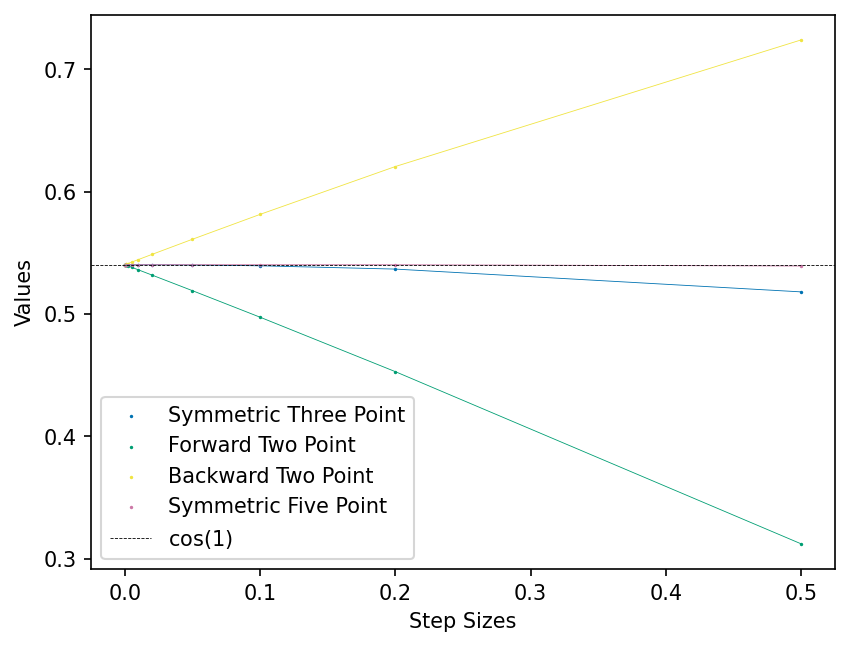

In [422]:
plt.figure(dpi=150)
for n, i in enumerate(problem1df):
    color = colormap(n)
    if "Step Sizes" == i:
        pass
    else:
        plt.scatter(
            problem1df["Step Sizes"],
            problem1df[f"{i}"],
            label=f"{i}",
            s=0.4,
            color=color,
        )
        plt.plot(problem1df["Step Sizes"], problem1df[f"{i}"], lw=0.4, color=color)
plt.axhline(np.cos(1), ls="dashed", c="black", label=r"$\cos(1)$", lw=0.4)
plt.legend()
plt.xlabel("Step Sizes")
plt.ylabel("Values")
# plt.savefig("Num_Methods/problem1.png")
plt.show()

In [ ]:
# Constants
l = 0
r_min = 0.0001  # fm
r_max = 10  # fm
N = 1000
r0 = 1.27  # fm
A = 16  # Atomic mass
a = 0.67  # fm
R = r0 * A ** (1 / 3)  # fm
V0 = 51  # MeV


# Define grid
step_size = (r_max - r_min) / (N - 1)
r_vect = np.linspace(r_min, r_max, N)

# Define Woods-Saxon potential
Vf = -V0 / (1 + np.exp((r_vect - R) / a))

# Define angular momentum term
ell_term = l * (l + 1) / r_vect**2


# Define Hamiltonian matrix
ham_mat = (-2 * np.eye(N) + np.eye(N, k=1) + np.eye(N, k=-1)) / (2 * (step_size**2))
H = -ham_mat + np.diag(ell_term) + np.diag(Vf)

# Solve eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(H)

In [415]:
# Convert energies to MeV
eigenvalues_mev = eigenvalues
bound_indices = eigenvalues_mev < 0
bound_energies = eigenvalues_mev[bound_indices]
bound_wavefunctions = eigenvectors[:, bound_indices]

# normalization
for i in range(bound_wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(bound_wavefunctions[:, i] ** 2) * step_size)
    bound_wavefunctions[:, i] /= norm

bound_energies

array([-48.00290322, -44.37846388, -40.30219998, -35.90561771,
       -31.29729664, -26.57615264, -21.83959241, -17.18985146,
       -12.74061498,  -8.62585193,  -5.01391867,  -2.13364813,
        -0.32975941])

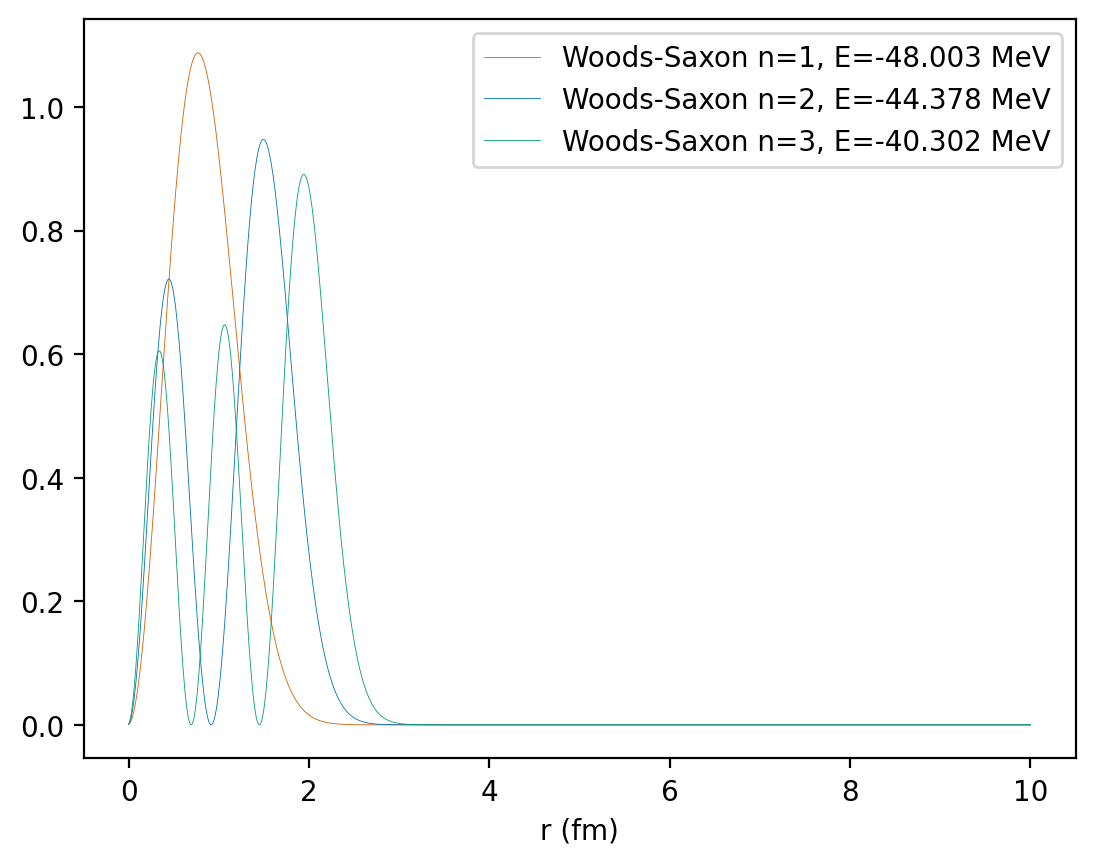

In [416]:
# Plot potential and wavefunction
plt.figure(dpi=200)
for i, energy in enumerate(bound_energies[:3]):  # Compare first 3 bound states
    color = colormap(i)
    plt.plot(
        r_vect,
        abs(bound_wavefunctions[:, i]) ** 2,
        label=f"Woods-Saxon n={i+1}, E={energy:.3f} MeV",
        lw=0.3,
        color=color,
    )
plt.xlabel("r (fm)")
plt.legend()
plt.show()

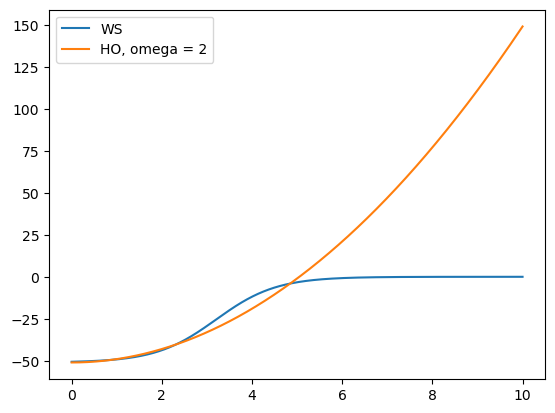

In [417]:
plt.plot(r_vect, Vf, label="WS")
omega = 2
HO = (1 / 2) * (omega**2) * (r_vect) ** 2 - V0

plt.plot(r_vect, HO, label=f"HO, omega = {omega}")
plt.legend()

In [418]:
# Define Hamiltonian matrix
HOmat = -ham_mat + np.diag(ell_term) + np.diag(HO)

# Solve eigenvalue problem
eigenvalues_HO, eigenvectors_HO = np.linalg.eigh(HOmat)

In [419]:
bound_indices_HO = eigenvalues_HO < 0
bound_energies_HO = eigenvalues_HO[bound_indices_HO]
bound_wavefunctions_HO = eigenvectors_HO[:, bound_indices_HO]

# normalization
for i in range(bound_wavefunctions_HO.shape[1]):
    normHO = np.sqrt(np.sum(bound_wavefunctions_HO[:, i] ** 2) * step_size)
    bound_wavefunctions_HO[:, i] /= normHO

bound_energies_HO

array([-48.03153644, -44.04759479, -40.059903  , -36.07043497,
       -32.07993168, -28.08876374, -24.09714736, -20.10522156,
       -16.11308194, -12.12079751,  -8.12842009,  -4.13598968,
        -0.14353797])

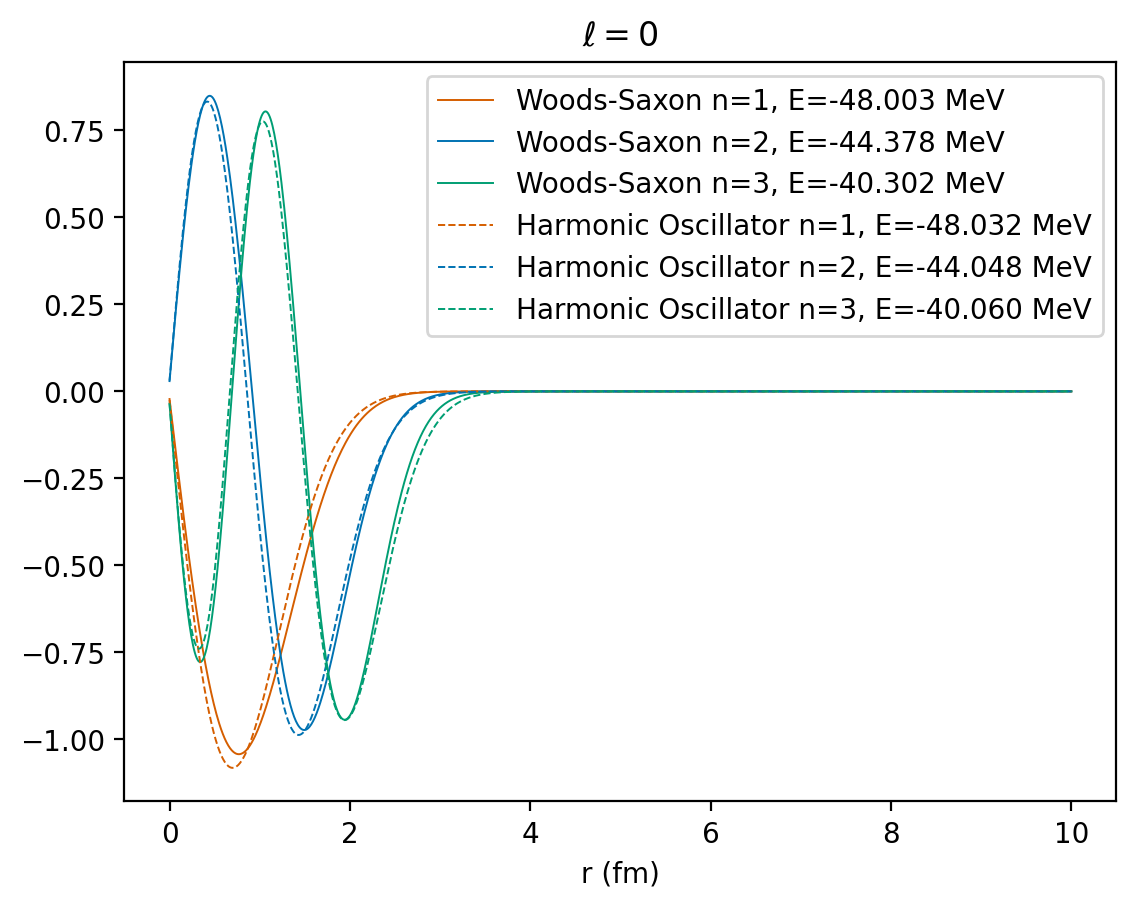

In [420]:
# Plot Woods-Saxon and Harmonic Oscillator wavefunctions
plt.figure(dpi=200)
plot_num = 3
for i, energy in enumerate(bound_energies[:plot_num]):  # Woods-Saxon
    color = colormap(i)  # Get a consistent color for this index
    plt.plot(
        r_vect,
        bound_wavefunctions[:, i],
        label=f"Woods-Saxon n={i+1}, E={energy:.3f} MeV",
        lw=0.7,
        color=color,
    )

for j, energy_HO in enumerate(bound_energies_HO[:plot_num]):  # Harmonic Oscillator
    color = colormap(j)  # Use the same color as for Woods-Saxon
    plt.plot(
        r_vect,
        bound_wavefunctions_HO[:, j],
        label=f"Harmonic Oscillator n={j+1}, E={energy_HO:.3f} MeV",
        lw=0.7,
        ls="dashed",
        color=color,
    )

plt.xlabel("r (fm)")
plt.title(rf"$\ell = {l}$")
plt.legend()
plt.show()